# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [187]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [188]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [193]:
#  1. Get the total rides for each city type
total_rides_per_type = pyber_data_df.groupby('type').count()['ride_id']

In [194]:
# 2. Get the total drivers for each city type
#used city_data_df instead of pyber_data_df since there are duplicate city names in the latter dataset
total_drivers_per_type = city_data_df.groupby('type').sum()['driver_count']

In [195]:
#  3. Get the total amount of fares for each city type
total_fares_per_type = pyber_data_df.groupby('type').sum()['fare']

In [196]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares_per_type / total_rides_per_type


In [197]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares_per_type / total_drivers_per_type

In [198]:
#  6. Create a PyBer summary DataFrame. 
# 6.1 Create new Dictionary to hold data
pyber_summary_dict = {
    'Total Rides': total_rides_per_type,
    'Total Drivers': total_drivers_per_type,
    'Total Fares': total_fares_per_type,
    'Average Fare per Ride': avg_fare_per_ride,
    'Average Fare per Driver': avg_fare_per_driver
    
}

# 6.2 Convert dictionary to a Python Dataframe
pyber_summary_df = pd.DataFrame(pyber_summary_dict)

In [199]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [200]:
#  8. Format the columns.
pyber_summary_df[['Total Rides', 'Total Drivers']] = pyber_summary_df[['Total Rides', 'Total Drivers']].applymap('{:,}'.format)
pyber_summary_df[['Total Fares', 'Average Fare per Ride', 'Average Fare per Driver']] = pyber_summary_df[['Total Fares', 'Average Fare per Ride', 'Average Fare per Driver']].applymap('${:,.2f}'.format) 

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame


In [284]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares_per_date = pyber_data_df.groupby(['type', 'date']).sum()[['fare']]

In [285]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_of_fares_per_date = sum_of_fares_per_date.reset_index()

In [286]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_of_fares_per_date = sum_of_fares_per_date.pivot(index = 'date', columns = 'type', values = 'fare')

In [287]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_april_sum_of_fares = sum_of_fares_per_date.loc['2019-01-01':'2019-04-29']

In [288]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

jan_april_sum_of_fares.index = pd.to_datetime(jan_april_sum_of_fares.index)


In [289]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_april_sum_of_fares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [290]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
jan_april_sum_of_fares = jan_april_sum_of_fares.resample('W').sum()

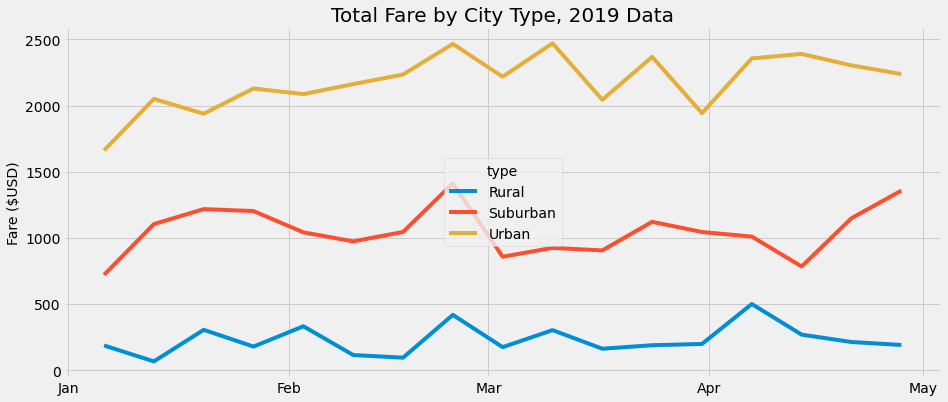

In [293]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates


fig, ax = plt.subplots(figsize = (14,6))
ax.plot(jan_april_sum_of_fares)
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax.set_title('Total Fare by City Type, 2019 Data',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
#ax.set_xlim(jan_april_sum_of_fares.index.min(),jan_april_sum_of_fares.index.max())
ax.legend(labels = ['Rural','Suburban','Urban'], loc = 'center', title = 'type')
# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.savefig('Analysis\PyBer_fare_summary.png')
plt.show()



